<a href="https://colab.research.google.com/github/MigueLucena/Determinacion-Tipos-de-Estrellas/blob/main/Practica2NT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PABLO PÉREZ GARCÍA (100472243) MIGUEL LUCENA BELMONTE (100472277)**

**EJERCICIO 1: PROGRAMACIÓN DE K-MEANS Y COMPARACIÓN CON LA IMPLEMENTACIÓN DE SKLEARN**

*Usando el scaler StandardScaler:*

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def load_data(file_path):
    data = pd.read_csv(file_path)

    # Detectar columnas no numéricas y numéricas
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    if len(non_numeric_columns) > 0:
        # Aplicar codificación one-hot a las columnas no numéricas
        encoder = OneHotEncoder(sparse=False)
        non_numeric_data = encoder.fit_transform(data[non_numeric_columns])
        encoded_columns = pd.DataFrame(non_numeric_data, columns=encoder.get_feature_names_out(non_numeric_columns))

    if len(numeric_columns) > 0:
        # Escalar las columnas numéricas
        scaler = StandardScaler()
        scaled_numeric_data = scaler.fit_transform(data[numeric_columns])
        scaled_numeric_columns = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

    # Combinar los datos codificados y escalados de nuevo en un solo DataFrame
    if len(non_numeric_columns) > 0 and len(numeric_columns) > 0:
        data = pd.concat([scaled_numeric_columns, encoded_columns], axis=1)
    elif len(non_numeric_columns) > 0:
        data = encoded_columns
    elif len(numeric_columns) > 0:
        data = scaled_numeric_columns

    return data.values

# Ejemplo de cómo utilizar la función
data = load_data("stars_data.csv")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time

def kmeans_programada(data, n_clusters, max_iters=300):
  #Se inicializan los centroides aleatoriamente
  centroids = data[np.random.choice(data.shape[0], n_clusters, replace = False)]

  for _ in range(max_iters):
        # Asignamos cada punto al centroide más cercano
        labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)

        # Actualizamos los centroides como la media de los puntos asignados a ellos
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(n_clusters)])

        # Si los centroides no cambian, salimos del bucle
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

        return centroids, labels


#Especificamos el número de clusters con el que se va a trabajar
n_clusters = 3

# Medimos el tiempo de ejecución y comparar con la implementación de scikit-learn
start_time_custom = time.time()
centroids_custom, labels_custom = kmeans_programada(data, n_clusters)
end_time_custom = time.time()
custom_time = end_time_custom - start_time_custom

start_time_sklearn = time.time()
kmeans_sklearn = KMeans(n_clusters=n_clusters)
labels_sklearn = kmeans_sklearn.fit_predict(data)
end_time_sklearn = time.time()
sklearn_time = end_time_sklearn - start_time_sklearn

# Calculamos el coeficiente de silueta para ambas implementaciones
silhouette_custom = silhouette_score(data, labels_custom)
silhouette_sklearn = silhouette_score(data, labels_sklearn)

print("Resultados de K-Means personalizado:")
print("Centroides:", centroids_custom)
print("Etiquetas:", labels_custom)
print("Coeficiente de silueta:", silhouette_custom)
print("Tiempo de ejecución:", custom_time)

print("\nResultados de K-Means en scikit-learn:")
print("Centroides:", kmeans_sklearn.cluster_centers_)
print("Etiquetas:", labels_sklearn)
print("Coeficiente de silueta:", silhouette_sklearn)
print("Tiempo de ejecución:", sklearn_time)



Resultados de K-Means personalizado:
Centroides: [[-0.74608825 -0.18518039  0.19430199  0.15181078  0.          0.
   0.          0.          0.          0.01010101  0.01010101  0.
   0.93939394  0.          0.          0.          0.01010101  0.
   0.          0.01010101  0.02020202  0.          0.          0.01010101
   0.01010101  0.05050505  0.92929293  0.        ]
 [ 0.84864986  0.34393391 -0.04165753 -0.45262456  0.51376147  0.09174312
   0.01834862  0.00917431  0.23853211  0.00917431  0.          0.
   0.          0.02752294  0.          0.01834862  0.          0.01834862
   0.01834862  0.03669725  0.          0.11926606  0.42201835  0.08256881
   0.          0.00917431  0.          0.36697248]
 [-0.58250307 -0.59862305 -0.4592258   1.07208783  0.          0.
   0.0625      0.          0.          0.          0.          0.03125
   0.59375     0.125       0.03125     0.          0.          0.03125
   0.03125     0.09375     0.          0.1875      0.          0.21875
   0.     

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


*Sin usar ningún scaler:*

In [11]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def load_data(file_path):
    data = pd.read_csv(file_path)

    # Detectar columnas no numéricas y aplicar codificación one-hot
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    if len(non_numeric_columns) > 0:
        encoder = OneHotEncoder(sparse=False)
        non_numeric_data = encoder.fit_transform(data[non_numeric_columns])

        # Eliminar las columnas originales no numéricas
        data = data.drop(non_numeric_columns, axis=1)

        # Añadir los datos codificados al DataFrame original
        encoded_columns = pd.DataFrame(non_numeric_data, columns=encoder.get_feature_names_out(non_numeric_columns))
        data = pd.concat([data, encoded_columns], axis=1)

    return data.values

# Ejemplo de cómo utilizar la función
data = load_data("stars_data.csv")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:

# Medimos el tiempo de ejecución y comparar con la implementación de scikit-learn
start_time_custom = time.time()
centroids_custom, labels_custom = kmeans_programada(data, n_clusters)
end_time_custom = time.time()
custom_time = end_time_custom - start_time_custom

start_time_sklearn = time.time()
kmeans_sklearn = KMeans(n_clusters=n_clusters)
labels_sklearn = kmeans_sklearn.fit_predict(data)
end_time_sklearn = time.time()
sklearn_time = end_time_sklearn - start_time_sklearn

# Calculamos el coeficiente de silueta para ambas implementaciones
silhouette_custom = silhouette_score(data, labels_custom)
silhouette_sklearn = silhouette_score(data, labels_sklearn)

print("Resultados de K-Means personalizado:")
print("Centroides:", centroids_custom)
print("Etiquetas:", labels_custom)
print("Coeficiente de silueta:", silhouette_custom)
print("Tiempo de ejecución:", custom_time)

print("\nResultados de K-Means en scikit-learn:")
print("Centroides:", kmeans_sklearn.cluster_centers_)
print("Etiquetas:", labels_sklearn)
print("Coeficiente de silueta:", silhouette_sklearn)
print("Tiempo de ejecución:", sklearn_time)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Resultados de K-Means personalizado:
Centroides: [[2.73404348e+03 6.81478261e-04 1.15973913e-01 1.69096522e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.05960000e+03 1.40000031e+04 1.46428500e+00 1.34065000e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [1.21589645e+04 1.29163486e+05 2.88760987e+02 2.00367005e+00
  2.84263959e-01 5.

**EJERCICIO 2: CODIFICACIÓN DE ONE-HOT ENCODING Y CODIFICACIÓN COMO VARIABLE ORDINAL**

Resultados del k-means de sklearn con one-hot encoding:

In [13]:
start_time_onehot = time.time()
kmeans_onehot = KMeans(n_clusters=n_clusters)
labels_onehot = kmeans_onehot.fit_predict(data)
end_time_onehot = time.time()
onehot_time = end_time_onehot - start_time_onehot

silhouette_onehot = silhouette_score(data, labels_onehot)

print("\nResultados de K-Means usando One-Hot Encoding:")
print("Etiquetas:", labels_onehot)
print("Coeficiente de silueta:", silhouette_onehot)
print("Tiempo de ejecución:", onehot_time)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Resultados de K-Means usando One-Hot Encoding:
Etiquetas: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 0 2 2 2 2 2 0
 2 2 0 2 2 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 2 2
 2 1 2 2 1 1 2 1 2 2 1 1 1 2 1 1 2 2]
Coeficiente de silueta: 0.8102645810507881
Tiempo de ejecución: 0.1102590560913086


Resultados del k-means de sklearn codificando como variable ordinal:



In [14]:
from sklearn.preprocessing import OrdinalEncoder

def load_data(file_path):
    data = pd.read_csv(file_path)

    # Detectar columnas no numéricas y numéricas
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    if len(non_numeric_columns) > 0:
        # Codificar las columnas no numéricas como variables ordinales
        encoder = OrdinalEncoder()
        ordinal_encoded_data = encoder.fit_transform(data[non_numeric_columns])
        ordinal_encoded_columns = pd.DataFrame(ordinal_encoded_data, columns=non_numeric_columns)

    if len(numeric_columns) > 0:
        # Escalar las columnas numéricas
        scaler = StandardScaler()
        scaled_numeric_data = scaler.fit_transform(data[numeric_columns])
        scaled_numeric_columns = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

    # Combinar los datos codificados y escalados de nuevo en un solo DataFrame
    if len(non_numeric_columns) > 0 and len(numeric_columns) > 0:
        data = pd.concat([scaled_numeric_columns, ordinal_encoded_columns], axis=1)
    elif len(non_numeric_columns) > 0:
        data = ordinal_encoded_columns
    elif len(numeric_columns) > 0:
        data = scaled_numeric_columns

    return data.values

data = load_data("stars_data.csv")



start_time_ordinal = time.time()
kmeans_ordinal = KMeans(n_clusters=n_clusters)
labels_ordinal = kmeans_ordinal.fit_predict(data)
end_time_ordinal = time.time()
ordinal_time = end_time_ordinal - start_time_ordinal

silhouette_ordinal = silhouette_score(data, labels_ordinal)

print("\nResultados de K-Means usando One-Hot Encoding:")
print("Etiquetas:", labels_ordinal)
print("Coeficiente de silueta:", silhouette_ordinal)
print("Tiempo de ejecución:", ordinal_time)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Resultados de K-Means usando One-Hot Encoding:
Etiquetas: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 1 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 2 0 0 0 0 2 2 0 0 2 1 2 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 0
 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 0 1 2 2 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 0 1 1
 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 0 0 1]
Coeficiente de silueta: 0.5925813744664216
Tiempo de ejecución: 0.02500295639038086


Como se puede ver, el tiempo de ejecución usando el cifrado con OrdinalEncoder es menor que si usamos One-Hot Encoding, sin embargo, al realizar el cifrado de las variables categóricas con One-Hot Encoding se obtiene mayor coeficiente de silueta, lo que nos indica que es más preciso.

**EJERCICIO 3: APLICACIÓN DE ALGORITMOS DE CLUSTERING**

*Carga de datos aplicando One-Hot Encoding:*



In [15]:
from sklearn.decomposition import PCA

def load_data_onehot_pca(file_path):
    data = pd.read_csv(file_path)

    # Detectar columnas no numéricas y numéricas
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    if len(non_numeric_columns) > 0:
        # Aplicar codificación one-hot a las columnas no numéricas
        encoder = OneHotEncoder(sparse=False)
        non_numeric_data = encoder.fit_transform(data[non_numeric_columns])
        encoded_columns = pd.DataFrame(non_numeric_data, columns=encoder.get_feature_names_out(non_numeric_columns))

    if len(numeric_columns) > 0:
        # Escalar las columnas numéricas
        scaler = StandardScaler()
        scaled_numeric_data = scaler.fit_transform(data[numeric_columns])
        scaled_numeric_columns = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

    # Combinar los datos codificados y escalados de nuevo en un solo DataFrame
    if len(non_numeric_columns) > 0 and len(numeric_columns) > 0:
        data = pd.concat([scaled_numeric_columns, encoded_columns], axis=1)
    elif len(non_numeric_columns) > 0:
        data = encoded_columns
    elif len(numeric_columns) > 0:
        data = scaled_numeric_columns

    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)

    return data_pca

data_onehot_pca = load_data_onehot_pca("stars_data.csv")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


*Carga de datos usando OrdinalEncoder:*

In [16]:
def load_data_ordinal(file_path):
    data = pd.read_csv(file_path)

    # Detectar columnas no numéricas y numéricas
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    if len(non_numeric_columns) > 0:
        # Codificar las columnas no numéricas como variables ordinales
        encoder = OrdinalEncoder()
        ordinal_encoded_data = encoder.fit_transform(data[non_numeric_columns])
        ordinal_encoded_columns = pd.DataFrame(ordinal_encoded_data, columns=non_numeric_columns)

    if len(numeric_columns) > 0:
        # Escalar las columnas numéricas
        scaler = StandardScaler()
        scaled_numeric_data = scaler.fit_transform(data[numeric_columns])
        scaled_numeric_columns = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

    # Combinar los datos codificados y escalados de nuevo en un solo DataFrame
    if len(non_numeric_columns) > 0 and len(numeric_columns) > 0:
        data = pd.concat([scaled_numeric_columns, ordinal_encoded_columns], axis=1)
    elif len(non_numeric_columns) > 0:
        data = ordinal_encoded_columns
    elif len(numeric_columns) > 0:
        data = scaled_numeric_columns

    return data.values

data_ordinal = load_data_ordinal("stars_data.csv")

*Aplicando Hierarchical Clustering:*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


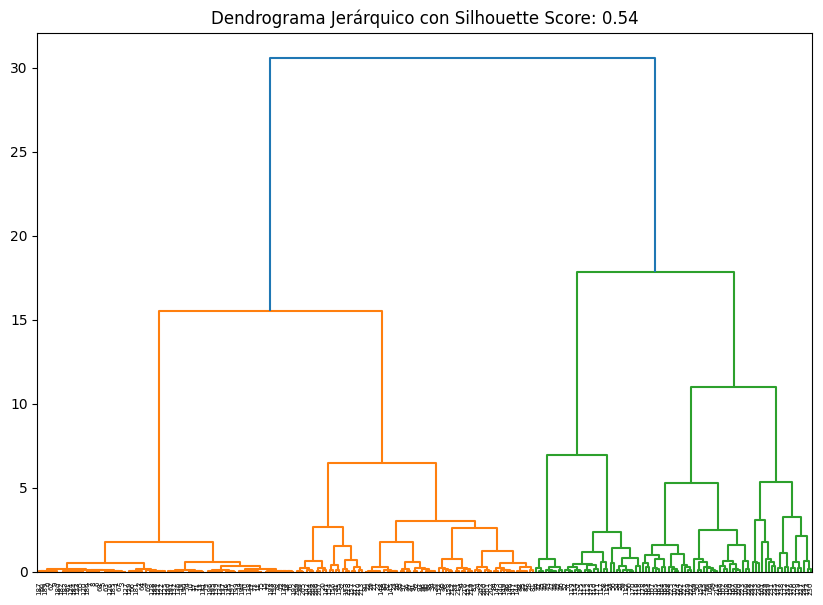

Resultados del clustering jerárquico:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 2 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

clustering = AgglomerativeClustering(n_clusters=3, affinity= 'euclidean' , linkage='ward')  # Número de clusters a encontrar
labels_onehot_pca = clustering.fit_predict(data_onehot_pca)

linkage_matrix_onehot_pca = linkage(data_onehot_pca, method='ward')
# Generar un dendrograma para visualizar la jerarquía de clusters

silhouette_avg = silhouette_score(data_onehot_pca, labels_onehot_pca)

plt.figure(figsize=(10, 7))
plt.title("Dendrograma Jerárquico con Silhouette Score: {:.2f}".format(silhouette_avg))
dendrogram(linkage_matrix_onehot_pca)  # No necesitas pasar los datos reales, solo para visualizar la estructura jerárquica
plt.show()

# Imprimir los resultados del clustering
print("Resultados del clustering jerárquico:")
print(labels_onehot_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


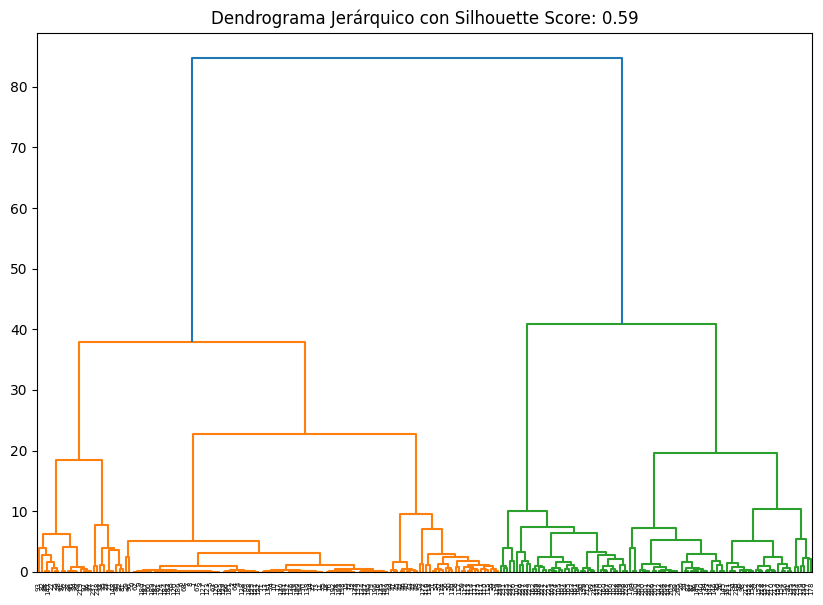

Resultados del clustering jerárquico:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 2 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 2 1 2 2 2 2 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 0 2 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 0 2 2
 2 2 2 2 2 2 2 2 1 2 2 1 1 2 2 0 0 2]


In [18]:
labels_ordinal = clustering.fit_predict(data_ordinal)

linkage_matrix_ordinal = linkage(data_ordinal, method='ward')
# Generar un dendrograma para visualizar la jerarquía de clusters

silhouette_avg = silhouette_score(data_ordinal, labels_ordinal)

plt.figure(figsize=(10, 7))
plt.title("Dendrograma Jerárquico con Silhouette Score: {:.2f}".format(silhouette_avg))
dendrogram(linkage_matrix_ordinal)  # No necesitas pasar los datos reales, solo para visualizar la estructura jerárquica
plt.show()

# Imprimir los resultados del clustering
print("Resultados del clustering jerárquico:")
print(labels_ordinal)

*Aplicando DBSCAN:*

In [19]:
from sklearn.cluster import DBSCAN


# Aplicar el algoritmo DBSCAN
eps = 0.5  # Radio de vecindad
min_samples = 5  # Número mínimo de puntos en una vecindad para ser considerado core point
clustering = DBSCAN(eps=eps, min_samples=min_samples)
labels_onehot = clustering.fit_predict(data_onehot)

# Calcular el coeficiente de silueta (opcional)
silhouette_avg = silhouette_score(data_onehot, labels_onehot)

# Imprimir los resultados del clustering
print("Resultados del clustering DBSCAN:")
print(labels_onehot)

# Si deseas imprimir el coeficiente de silueta
print("Coeficiente de Silueta:", silhouette_avg)


NameError: name 'data_onehot' is not defined

In [ ]:
# Aplicar el algoritmo DBSCAN
eps = 0.5  # Radio de vecindad
min_samples = 5  # Número mínimo de puntos en una vecindad para ser considerado core point
clustering = DBSCAN(eps=eps, min_samples=min_samples)
labels_ordinal = clustering.fit_predict(data_ordinal)

# Calcular el coeficiente de silueta (opcional)
silhouette_avg = silhouette_score(data_ordinal, labels_ordinal)

# Imprimir los resultados del clustering
print("Resultados del clustering DBSCAN:")
print(labels_ordinal)

# Si deseas imprimir el coeficiente de silueta
print("Coeficiente de Silueta:", silhouette_avg)